<a href="https://colab.research.google.com/github/khushimusterya/Prodigytech_task1/blob/main/ProdigyTech_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Name : Khushi Musterya  
Task : 3

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data (By using salary dataset from kaggle)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
# Load the dataset
data = pd.read_csv('/content/salary_prediction_data.csv')

In [ ]:
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [ ]:
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [ ]:
data.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

In [ ]:
data.dtypes

Education      object
Experience      int64
Location       object
Job_Title      object
Age             int64
Gender         object
Salary        float64
dtype: object

In [ ]:
#checking whether the data contains any null values
data.isnull().sum()

Education     749
Experience      0
Location        0
Job_Title       0
Age             0
Gender          0
Salary          0
dtype: int64

In [ ]:
#dropping the null values
data.dropna(inplace=True)

In [ ]:
#Converting the age and salary column data type
data['Age']=data['Age'].astype(int)
data['Salary']=data['Salary'].astype(int)

In [ ]:
data.dtypes

Education     float64
Experience      int64
Location       object
Job_Title      object
Age             int64
Gender          int64
Salary          int64
dtype: object

VISUALIZING DATA

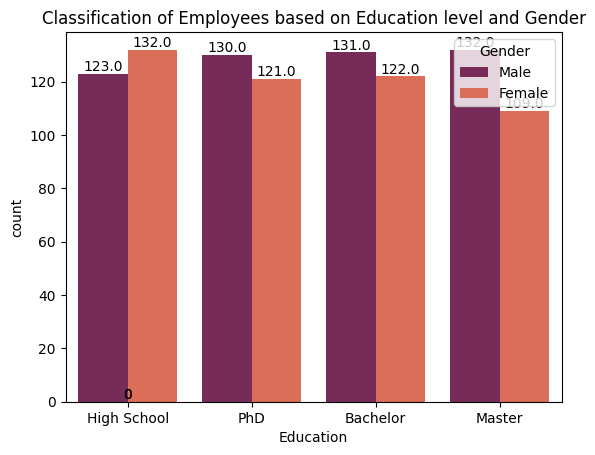

In [ ]:
#Classifying emp based on Education level and Gender
ax=sns.countplot(x='Education',data=data,hue='Gender',palette='rocket')
plt.title('Classification of Employees based on Education level and Gender')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2.,p.get_height(),f'{p.get_height()}',ha='center',va='bottom')

In the above graph, the males tend to have higher education level expect in the high school where the count of females are more than males.

Let check if there is any relation between the salary and years of experience

Text(0.5, 1.0, 'Relation between Years of Experience and Salary of Employees')

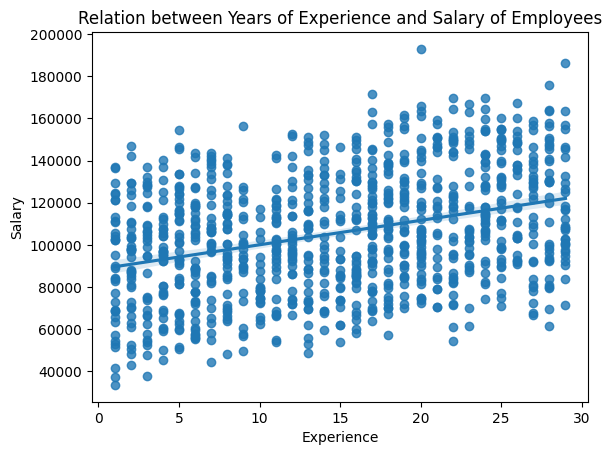

In [ ]:
sns.regplot(x='Experience',y='Salary',data=data)
plt.title('Relation between Years of Experience and Salary of Employees')

This shows that the salary is increased as the experience is increased.

DECISION TREE CLASSIFIER

In [ ]:
#converting the Education Level column into int datatype
#we use mapping function of the python
#1 = Bachelor's , 2 = Master's , 3 = PhD
data['Education']=data['Education'].map({'Bachelor\'s':1,'Master\'s':2,'PhD':3})

In [ ]:
#converting the Gender column into int datatype
#1 = Gender, 2 = Female
data['Gender']=data['Gender'].map({'Male':1,'Female':2})

In [ ]:
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
1,3.0,11,Suburban,Director,59,1,142591
4,3.0,25,Urban,Analyst,26,2,132157
5,3.0,19,Rural,Director,27,2,156312
6,3.0,4,Rural,Director,60,2,130567
7,3.0,13,Suburban,Director,49,2,148707


In [ ]:
#Splitting the data into training and testing data
#Independent variable
x=data[['Age','Gender','Education','Experience']]

#Dependent variable
y=data['Salary']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=43)

Creating a Decision Tree Classifier Model

In [ ]:
model=DecisionTreeClassifier(max_depth=3)

In [ ]:
#Fit the model
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Predicting using the Training model
prediction=model.predict(x_test)

In [ ]:
#Creating a dataframe that shows the actual value and the predicted value
df=pd.DataFrame({'Actual':y_test,'Predicted_value':prediction})

In [ ]:
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
1,3.0,11,Suburban,Director,59,1,142591
4,3.0,25,Urban,Analyst,26,2,132157
5,3.0,19,Rural,Director,27,2,156312
6,3.0,4,Rural,Director,60,2,130567
7,3.0,13,Suburban,Director,49,2,148707


In [ ]:
df.head()

,Actual,Predicted_value
34,134560,97925
949,127277,97925
321,151687,97925
491,157137,139809
391,131547,97925


Determining the accuracy of model

In [ ]:
accuracy=accuracy_score(y_test,prediction)

In [ ]:
print('The accuracy of the Decision Tree Classifier Model is: ',accuracy)

The accuracy of the Decision Tree Classifier Model is:  0.0


this accuracy indidcates 24% score of the prediction made by the model are accurate. An accuracy score of 0.24 indicates that the model performances is relatively low

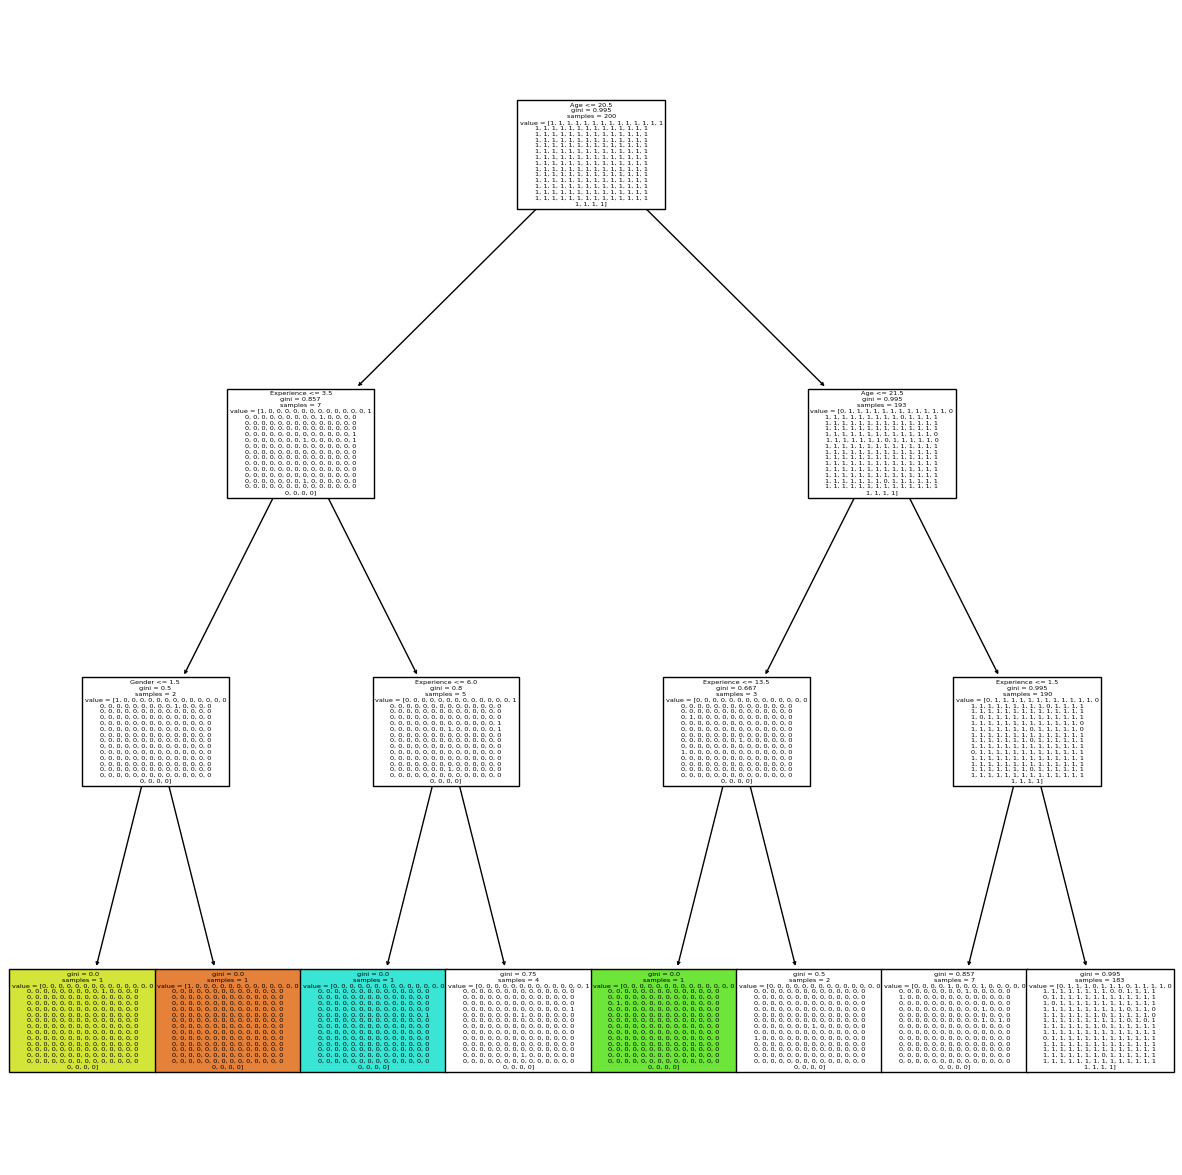

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(model,filled=True,feature_names=x.columns.tolist())
plt.show()